In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

To make the task more challenging, I choose cifar100 dataset, which has 100 classes and is much harder than mnist or cifar10.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

# train_images = np.expand_dims(train_images, -1).astype(np.float16)
# test_images = np.expand_dims(test_images, -1).astype(np.float16)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images.shape

(50000, 32, 32, 3)

The same neural network model as it in ImageClassifier.ipynb

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100))

Apparently there is a gap between train accuracy and test accuracy.

The reason why the gap happens is that overfitting. The model fits too well to the training set while ignoring other datasets such as test dataset.

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 [==============================] - 12s 5ms/step - loss: 4.0159 - accuracy: 0.0798 - val_loss: 3.5763 - val_accuracy: 0.1495
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 3.3834 - accuracy: 0.1841 - val_loss: 3.2482 - val_accuracy: 0.2134
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 3.0948 - accuracy: 0.2370 - val_loss: 3.0176 - val_accuracy: 0.2586
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 2.9071 - accuracy: 0.2758 - val_loss: 2.9022 - val_accuracy: 0.2828
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 2.7713 - accuracy: 0.3020 - val_loss: 2.7945 - val_accuracy: 0.3059
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 2.6620 - accuracy: 0.3245 - val_loss: 2.7464 - val_accuracy: 0.3166
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 2.5687 - accuracy: 0.3441 - val_loss: 2.7283 - val_accuracy

More obvious after ploting them out.

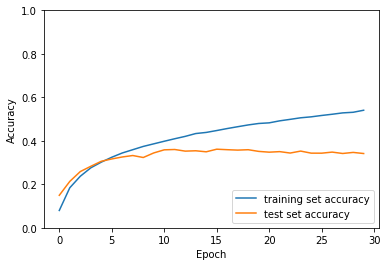

In [6]:
plt.plot(history.history['accuracy'], label='training set accuracy')
plt.plot(history.history['val_accuracy'], label = 'test set accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')